In [1]:
import urllib.request
import itertools

#print(urllib.request.urlopen("https://www.stackoverflow.com").getcode())
'''try:
    print(urllib.request.urlopen("https://track-dhl-info.de/").getcode())
except OSError:
    print("DNS error")'''
    
#print(['-'.join(el) for el in itertools.permutations(['track', 'info', 'dhl'], 3)])

for el in itertools.permutations(['track', 'info', 'dhl'], 3):
    try:
        print(urllib.request.urlopen("https://" + '-'.join(el) + ".de/").getcode())
    except OSError:
        print("DNS error: " + '-'.join(el))
    try:
        print(urllib.request.urlopen("https://" + ''.join(el) + ".de/").getcode())
    except OSError:
        print("DNS error: " + ''.join(el))
        
for el in itertools.permutations(['info', 'dps'], 2):
    try:
        print(urllib.request.urlopen("https://" + '-'.join(el) + ".de/").getcode())
    except OSError:
        print("DNS error: " + '-'.join(el))
    try:
        print(urllib.request.urlopen("https://" + ''.join(el) + ".de/").getcode())
    except OSError:
        print("DNS error: " + ''.join(el))

DNS error: track-info-dhl
DNS error: trackinfodhl
DNS error: track-dhl-info
DNS error: trackdhlinfo
DNS error: info-track-dhl
DNS error: infotrackdhl
DNS error: info-dhl-track
DNS error: infodhltrack
DNS error: dhl-track-info
DNS error: dhltrackinfo
DNS error: dhl-info-track
DNS error: dhlinfotrack
DNS error: info-dps
DNS error: infodps
DNS error: dps-info
DNS error: dpsinfo


1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000


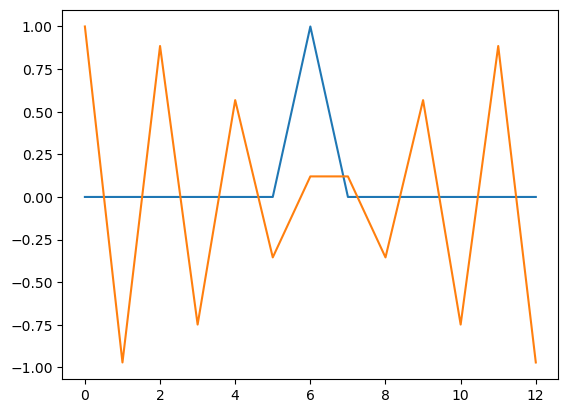

In [15]:
from numpy.fft import fft
from numpy import array
import matplotlib.pyplot as plt

a = array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,])
b = fft(a)
print( ' '.join("%5.3f" % abs(f) for f in b) )
plt.plot(a)
plt.plot(b)
plt.show()

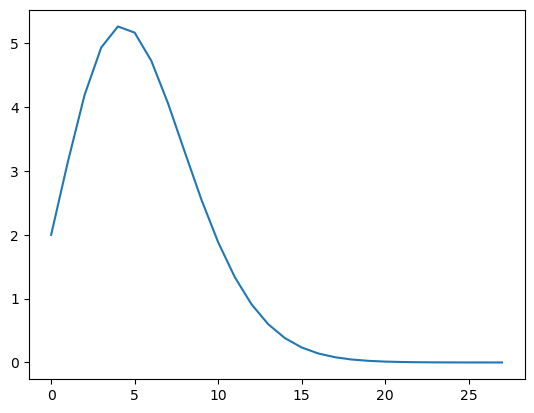

[2, 3.141592653589793, 4.1887902047863905, 4.934802200544679, 5.263789013914324, 5.167712780049969, 4.724765970331401, 4.058712126416768, 3.2985089027387064, 2.550164039877345, 1.8841038793898999, 1.335262768854589, 0.9106287547832829, 0.5992645293207919, 0.3814432808233043, 0.23533063035889312, 0.14098110691713897, 0.08214588661112819, 0.04662160103008852, 0.025806891390014047, 0.013949150409020995, 0.007370430945714347, 0.0038106563868521228, 0.0019295743094039218, 0.0009577224088231724, 0.00046630280576761223, 0.000222872124721274, 0.00010463810492484562]


In [1]:
# n-dim sphere
import math
import matplotlib.pyplot as plt

c1 = 2
c2 = math.pi
c = [c1, c2]
for i in range(4, 30, 2):
    c1 *= 2*math.pi/(i-1)
    c2 *= 2*math.pi/(i)
    c.append(c1)
    c.append(c2)
plt.plot(c)
plt.show()

print(c)

In [1]:
import math

def isprime(n):
    k = 2
    while k < int(math.sqrt(n) + 1):
        if n % k == 0:
            return False
        if k == 2:
            k += 1
        else:
            k += 2
    return True

print(sum([n for n in range(2, 44) if isprime(n)]))

281


In [2]:
import numpy as np
import scipy.optimize as opt

n0, K = 27, 7_800_000_000

def f(t, r):
    return (n0 * np.exp(r * t)) / (( 1 + n0 * (np.exp(r * t) - 1) / K))

y = [
27, 27, 27, 44, 44, 59, 59, 59, 59, 59, 59, 59, 59, 60, 60,
61, 61, 66, 83, 219, 239, 392, 534, 631, 897, 1350, 2023,
2820, 4587, 6067, 7823, 9826, 11946, 14554, 17372, 20615,
24522, 28273, 31491, 34933, 37552, 40540, 43105, 45177,
60328, 64543, 67103, 69265, 71332, 73327, 75191, 75723,
76719, 77804, 78812, 79339, 80132, 80995, 82101, 83365,
85203, 87024, 89068, 90664, 93077, 95316, 98172, 102133,
105824, 109695, 114232, 118610, 125497, 133852, 143227,
151367, 167418, 180096, 194836, 213150, 242364, 271106,
305117, 338133, 377918, 416845, 468049, 527767, 591704,
656866, 715353, 777796, 851308, 928436, 1000249, 1082054,
1174652,
]
x = np.linspace(0.0, 96, 97)

r, cov = opt.curve_fit(f, x, y, [0.5])

# Our answer for r given the world data and simplistic model
print("The r for the world Covid-19 data is:", r,
    ", with covariance of", cov)   
print("The calculated R0 is then", np.exp(12 * r))

The r for the world Covid-19 data is: [0.11230218] , with covariance of [[2.46164331e-08]]
The calculated R0 is then [3.8482793]


In [13]:
# Tensor product

# Sample 1
a1 = [[1, 2], [3, 4]]
b1 = [[0, 5], [6, 7]]

# Sample 2
a2 = [[0, 1, 0], [1, 1, 1], [0, 1, 0]]
b2 = [[1, 1, 1, 1], [1, 0, 0, 1], [1, 1, 1, 1]]

def kronecker(a, b):
    return [ [b[i % len(a)][j % len(a)] * a[i // len(a)][j // len(a)] for j in range(len(a) * len(b))] for i in range(len(a) * len(b))]

print(kronecker(a1, b1))
print(kronecker(a2, b2))

[[0, 5, 0, 10], [6, 7, 12, 14], [0, 15, 0, 20], [18, 21, 24, 28]]
[[0, 0, 0, 1, 1, 1, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 1, 1, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 0, 0, 1, 0, 0, 1, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 0, 0, 1, 1, 1, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 1, 1, 0, 0, 0]]
